In [35]:
import numpy as np
import pandas as pd
# import statsmodels.api as sm
from munch import Munch
from scipy import stats



# Two-sided inverse Students t-distribution
# p - probability, df - degrees of freedom
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))


import plotly.express as px
import matplotlib.pyplot as plt

## Standard van't Hoff equilibrium analysis

From class, the key equation we use to analyze chemical equilibria is

$$
\Delta_\text{r}G = \Delta_\text{r}H^\circ - T(\Delta_\text{r}S^\circ + R \ln{Q})
$$

At equilibrium, we have $\Delta_\text{r}G =0$ and $Q = K$. Over a small temperature range, we have


$$
\ln{K(T)}  \approx -\frac{\Delta_\text{r}H^{\circ}}{R} \frac{1}{T} + \frac{\Delta_\text{r}S^\circ}{R} 
$$

Example: Using absorbance $A = \varepsilon \ell c$, we can say the $\text{slope} = \varepsilon \ell$, so molar absorptivity $\varepsilon = \frac{\text{slope}}{\ell}$. We need to divide both the slope and its uncertainty by $\ell = 2.5$ cm in this example.

Here's an example of a standard analysis for absorbance data...

In [47]:
## Key function: stats.linregress
## Example for determining molar absorbtivity and uncertainties with a 2.5 cm path length cuvette

# Example input data
concentrations = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
Absorbances = np.array([0.23, 0.45, 0.68, 0.94, 1.15])

def absorbance_analysis(concs, As, path_length=1):
    

    # Linear regression
    results = stats.linregress(concs, As)

    # T-value to convert from standard error to confidence interval (0.05 means 1 - 0.05 = 95% interval)
    ts = tinv(0.05, len(concentrations) - 2) # Degrees of freedom

    slope_uncertainty = results.stderr * ts
    intercept_uncert = results.intercept_stderr * ts


    molar_abs = results.slope / path_length
    molar_abs_err =  slope_uncertainty / path_length
    
    
    predict = lambda x: x * results.slope + results.intercept
    predicted_A = predict(concs)
    
    resid = As - predicted_A
    
    df = pd.DataFrame({'conc_M': concs, "A": As, 'pred_A': predicted_A, 'resid': resid})
    
    
    return Munch(molar_abs=molar_abs, molar_abs_err=molar_abs_err,
                  df=df, predict=predict, results=results, intercept_uncert = intercept_uncert)


def plot_absorbance(results):
    fig, ax = plt.subplots()
    
    ax.plot(results.df.conc_M, results.df.A, '.')
    ax.plot(results.df.conc_M, results.df.pred_A)
    
    ax.set_xlabel("Concentration (M)")
    ax.set_ylabel("Absorbance $A$")
    
    return fig, ax

In [48]:
m = absorbance_analysis(concentrations, Absorbances, path_length=2.5)

# Print results...
print(f"molar absorptivity (1/cm-M) = {m.molar_abs:.3f} ± {m.molar_abs_err:.3f} (95% uncertainty)")
print(f"Intercept: {m.results.intercept:.3f} ± {m.intercept_uncert:.3f}")

molar absorptivity (1/cm-M) = 0.932 ± 0.052 (95% uncertainty)
Intercept: -0.009 ± 0.044


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Concentration (M)', ylabel='Absorbance $A$'>)

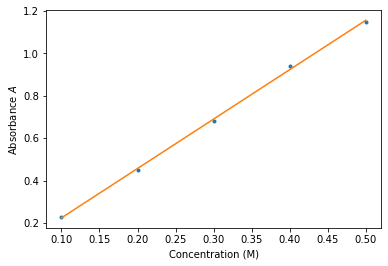

In [49]:
plot_absorbance(m)

# Now I can multiply both the

In [50]:
def equilibrium_analysis(temps, Ks):
    """Takes an array of temperatures temps and equilibrium constants Ks,
    returning the estimated enthalpy and entropy of reaction."""
    temps = np.array(temps) # Convert to an array
    Ks = np.array(Ks) # Convert to an array
    # Define the x, y values (1/T, ln(K))
    
    
    # Perform regression

    ts = tinv(0.05, len(temps) - 2) # Degrees of freedom
    

    
    
    # Calculate delta_H, delta_S, and the average temperature T_avg from the data
    # Return a nice munch of all the results...
    


def plot_eq_result(result):
    

SyntaxError: invalid syntax (2615170450.py, line 21)

In [ ]:
# 